# Human Resource Analytics

Alexander Peltier & Gabriel Aracena.

### Performance vs. Predictors

Performance refers to measurable outcoems of specific actions in various contexts that are quantified by metrics like grades, rates, or returns. Predictors are variables that are thought to influence these outcomes - ranging from quantitative (e.g., years of experience) to qualitative factors (e.g., academic background). 

Predictive modeling lies in utilizing predictors to forecast performance, which employs statistical methods and machine learning algorithms to discern how different variables correlate with or causually affect outcomes.

In the specific context of this assignment, we have 35 data features (or components) that we are trying to analyze using PCA.

In [6]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv('data/data.csv')

# Preprocessing

Encode categorical variables and standardize numerical variables.

In [8]:

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# CEV

In [9]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

Analysis of the CEV tells us that components past ~27 or so components retain no more data then if we include the rest of the components.

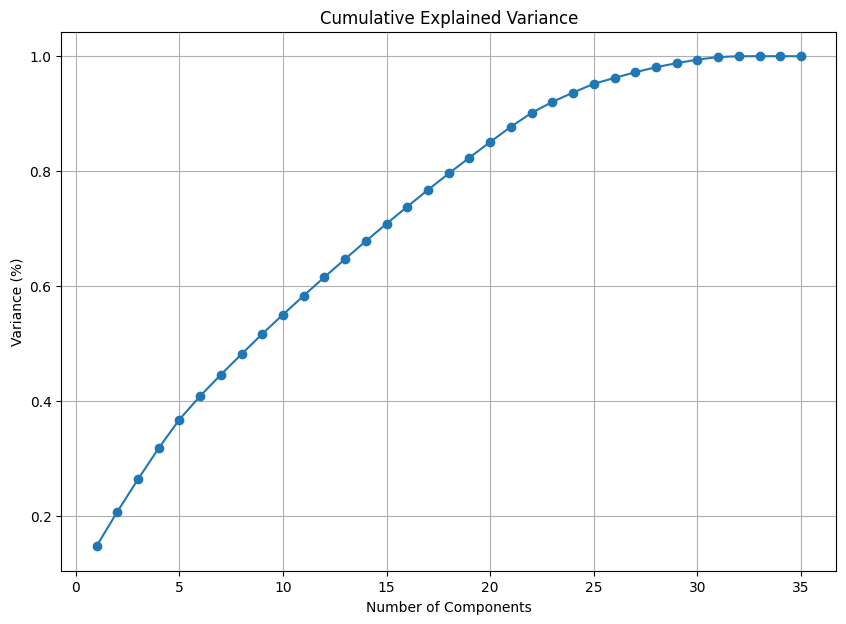

In [10]:
plt.figure(figsize=(10,7))
plt.plot(range(1, len(df_scaled.columns)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.grid(True)
plt.show()

# Feature Importance

Analysis of feature importance tells us that the most important features by a large margin are:

- TotalWorkingYears
- YearsAtCompany
- JobLevel
- MonthlyIncome
- YearsInCurrentRole
- YearsWithCurrManager
- YearsSinceLastPromotion
- Age

# Eigenvalue Scree Plot

The eigenvalue scree plot tells us how many principal components to keep during dimensionality reduction. Upon analysis, we can see that we come to the same conclusion earlier: only the first few components are important - the first component being the most important by a wide margin.

In [11]:
eigenvalues = pca.explained_variance_

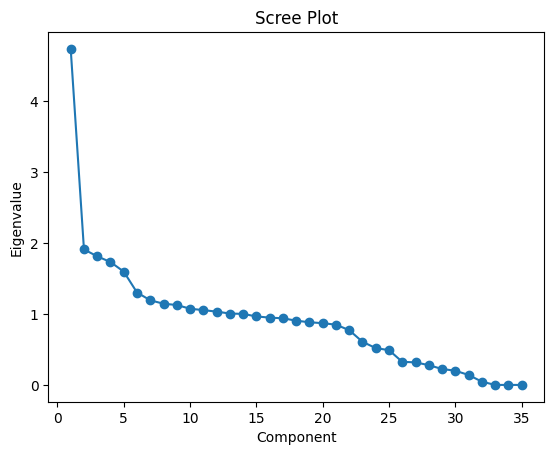

In [12]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

# Cronbach Alpha

A Cronbach Alpha of 0.45 suggests there is poor internal consistency in our data.

In [13]:
alpha = pg.cronbach_alpha(df_scaled)

print(f'Cronbach\'s alpha: {alpha[0]}')

Cronbach's alpha: 0.4716511581250152


# Correlation Matrix

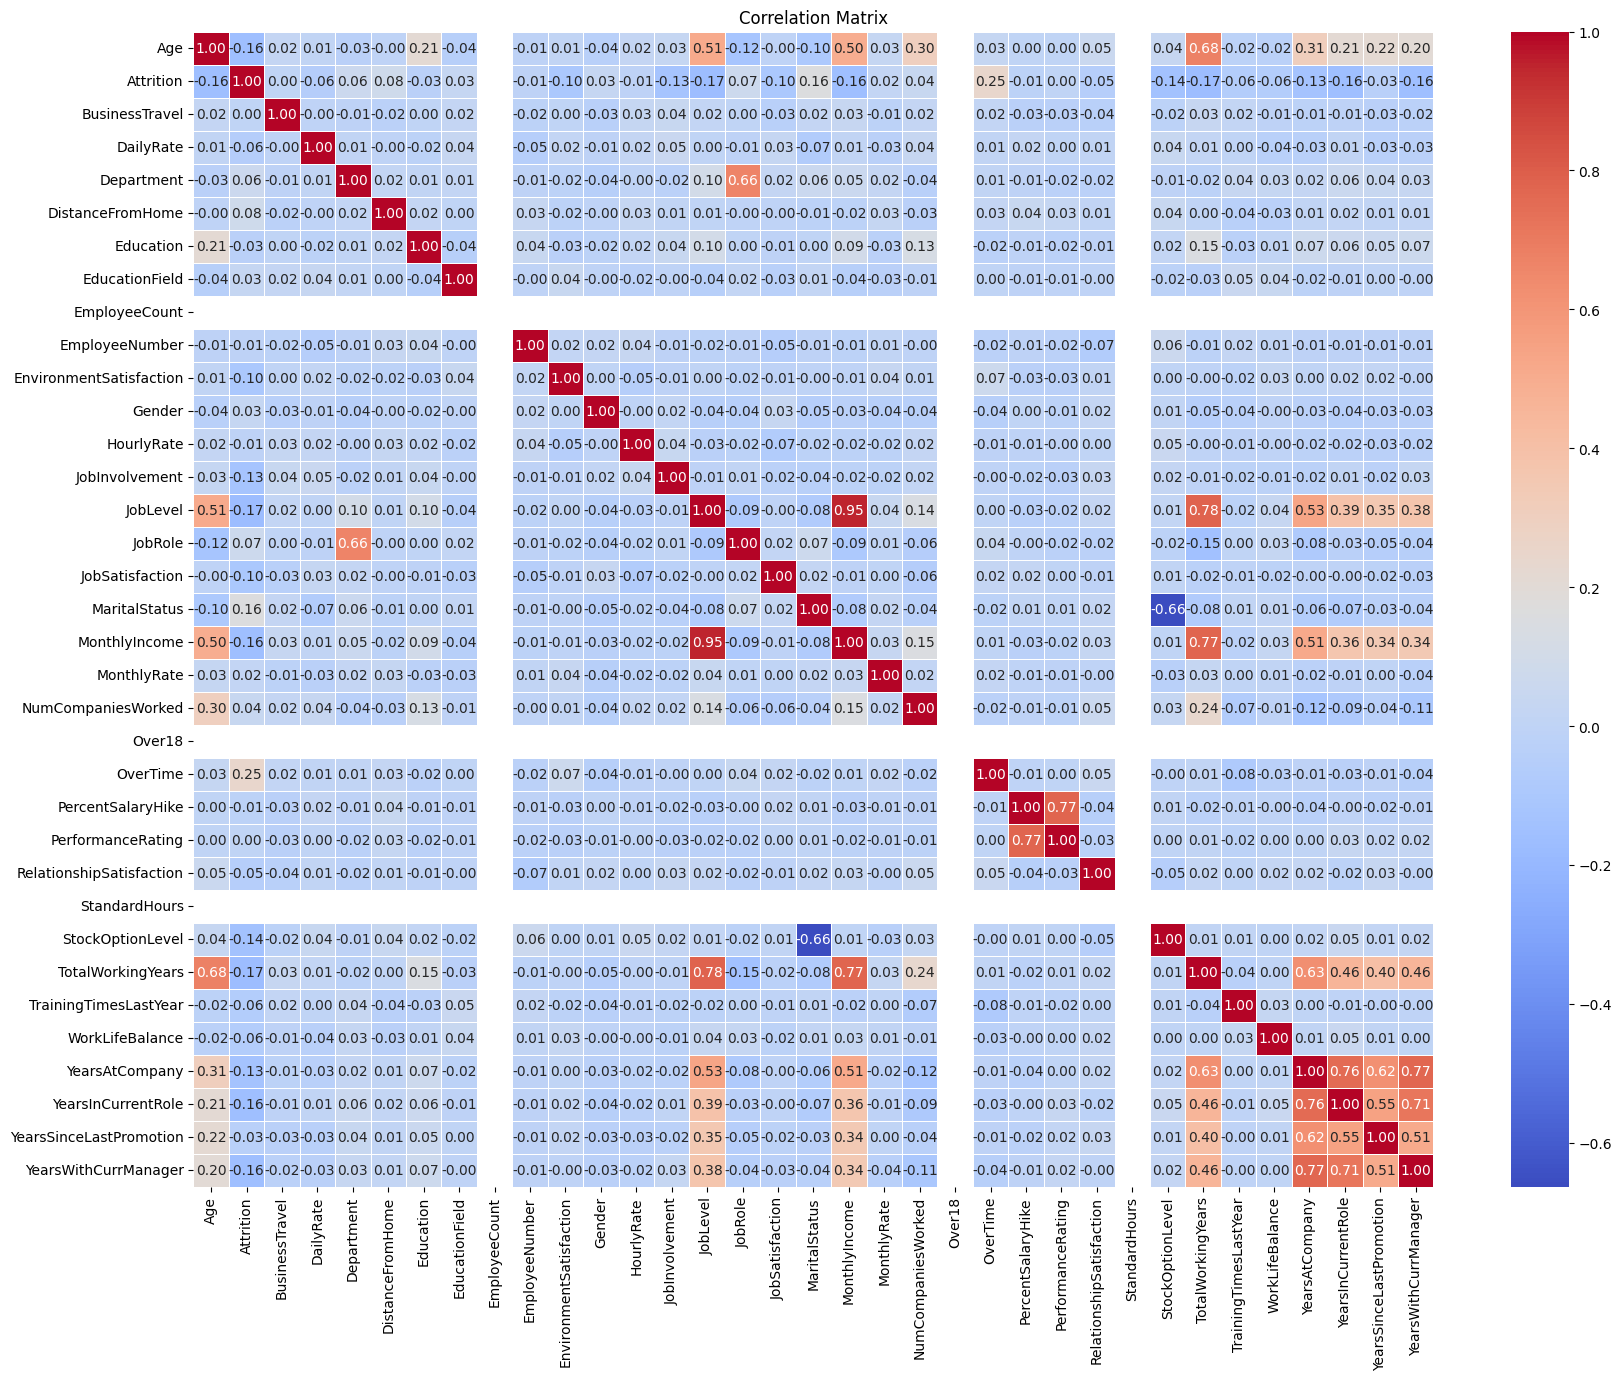

In [14]:
correlation_matrix = df_scaled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation Matrix with only first 8 important components

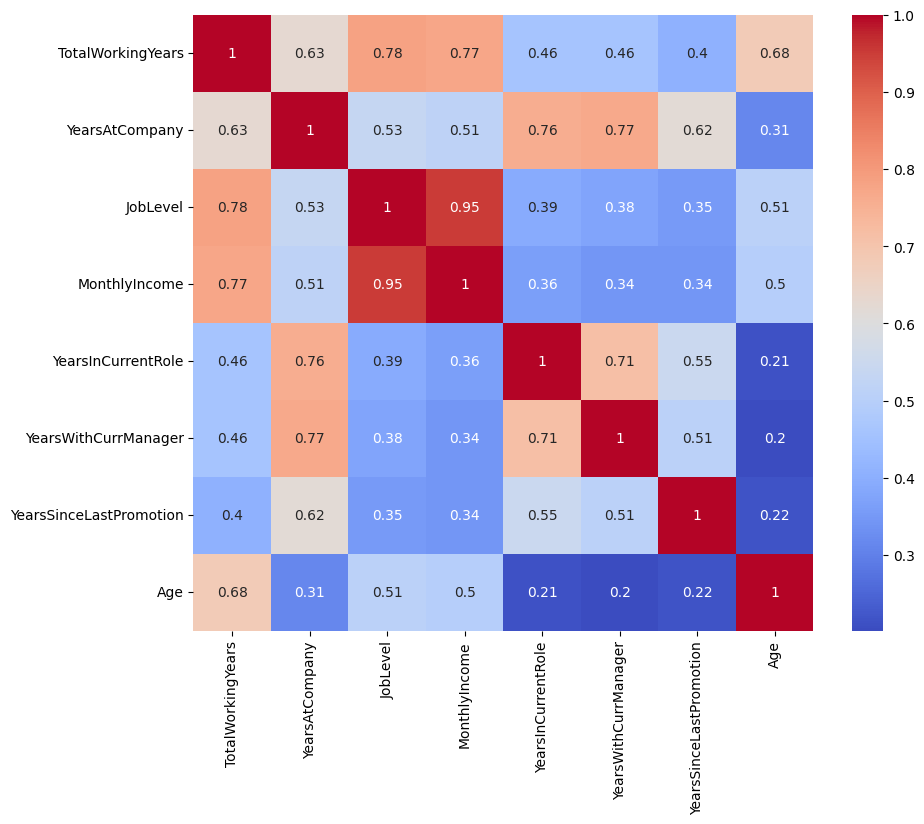

In [15]:
selected_columns = [
    'TotalWorkingYears',
    'YearsAtCompany',
    'JobLevel',
    'MonthlyIncome',
    'YearsInCurrentRole',
    'YearsWithCurrManager',
    'YearsSinceLastPromotion',
    'Age'
]

correlation_matrix = df_scaled[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Covariance Matrix

The covariance matrix tells us the covariance between a pair of variables: that is, the strength and direction of the relationship.

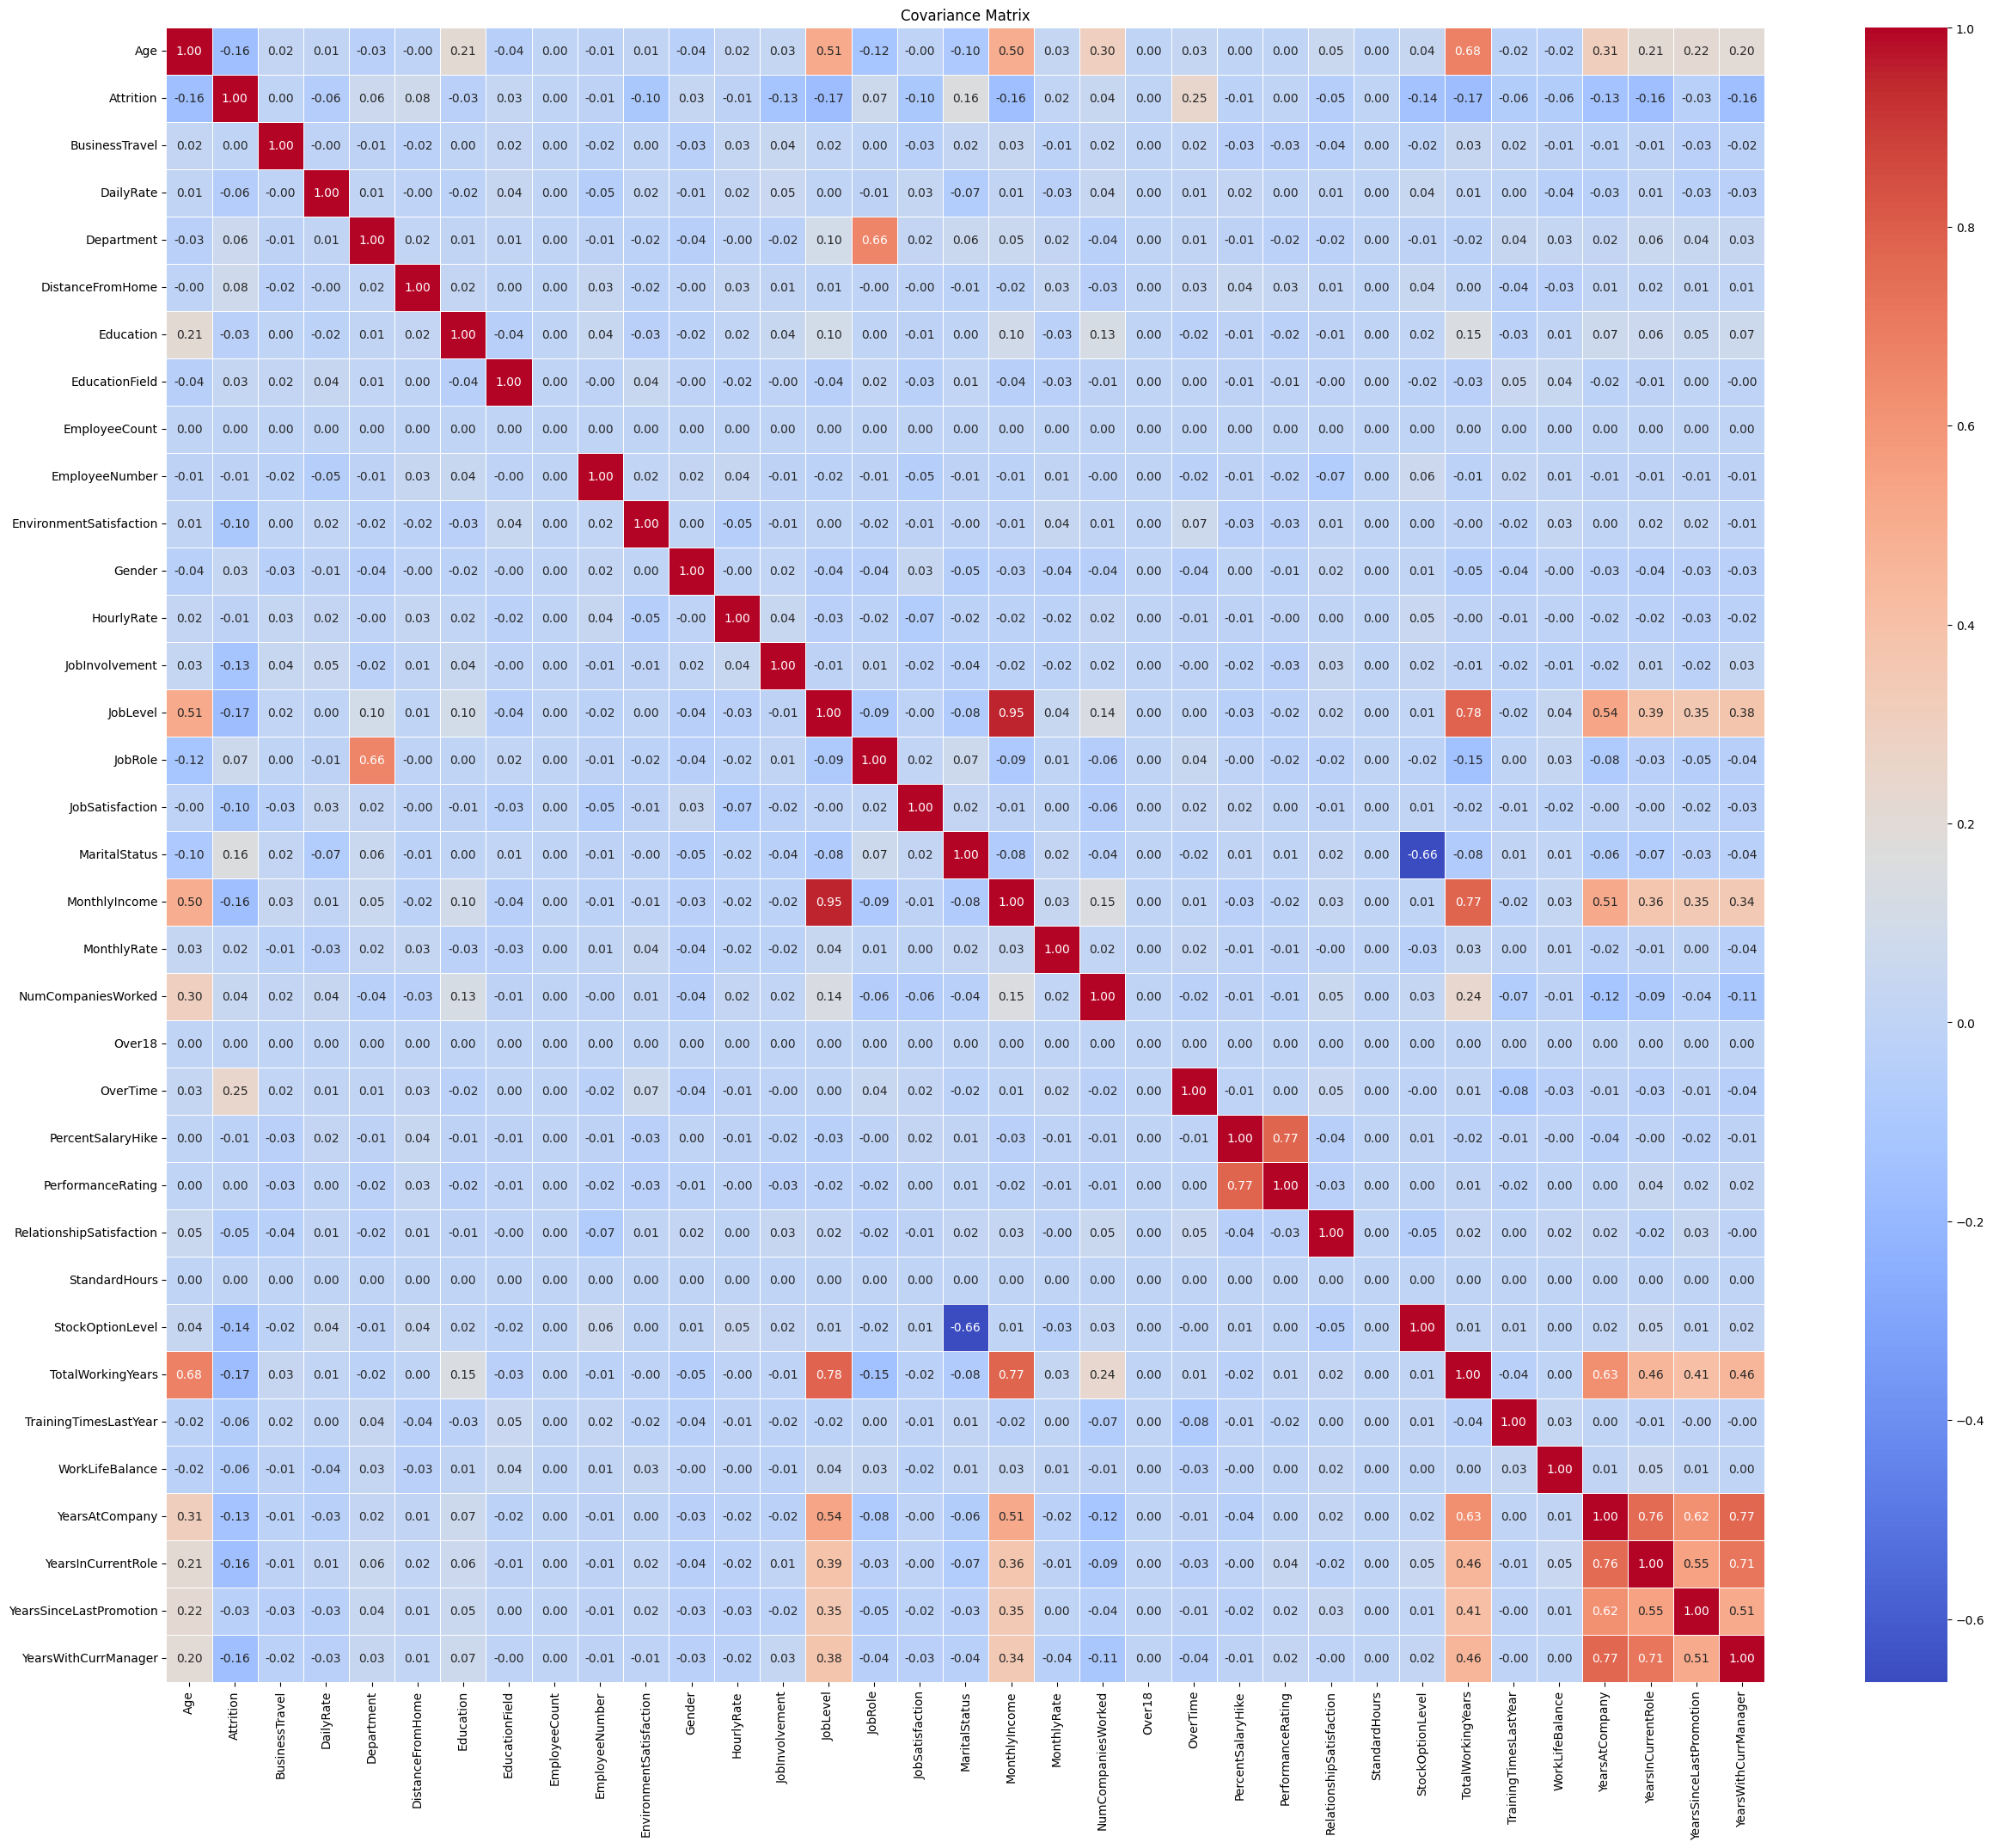

In [16]:
covariance_matrix = df_scaled.cov()

plt.figure(figsize=(30, 25))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

In [17]:
correlations = pg.pairwise_corr(df_scaled, method='pearson')

# Correlation Coefficients & P-values

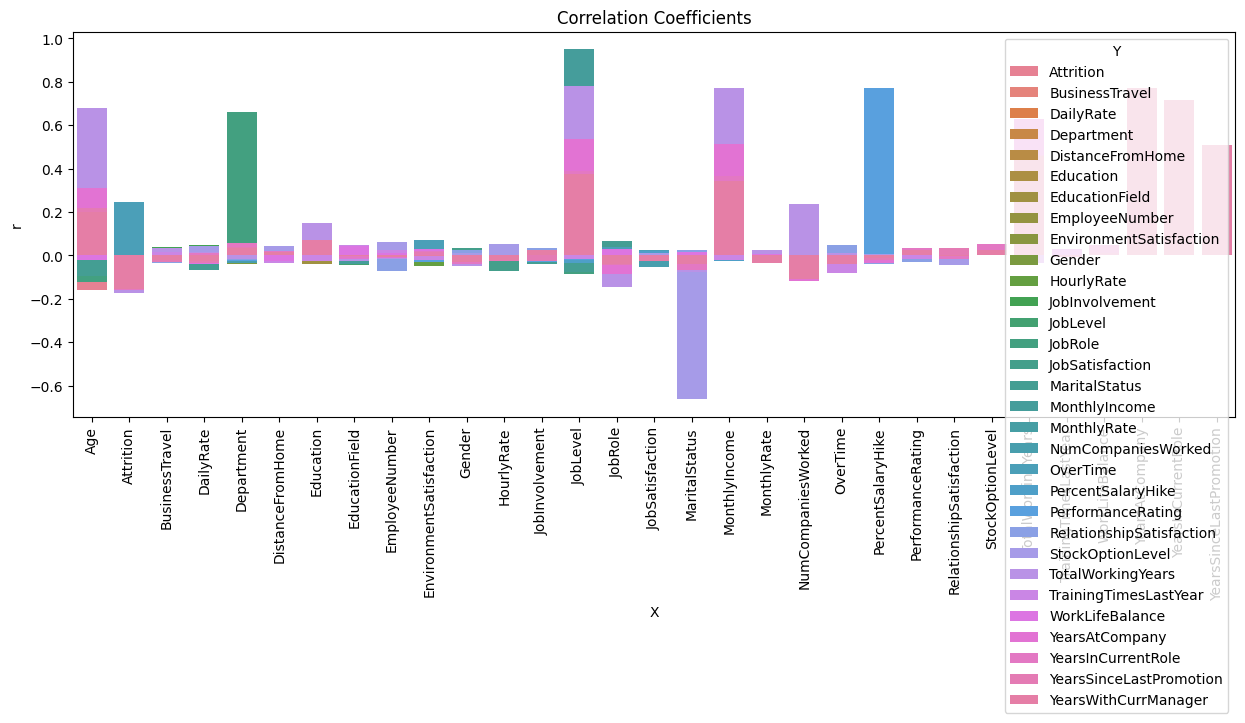

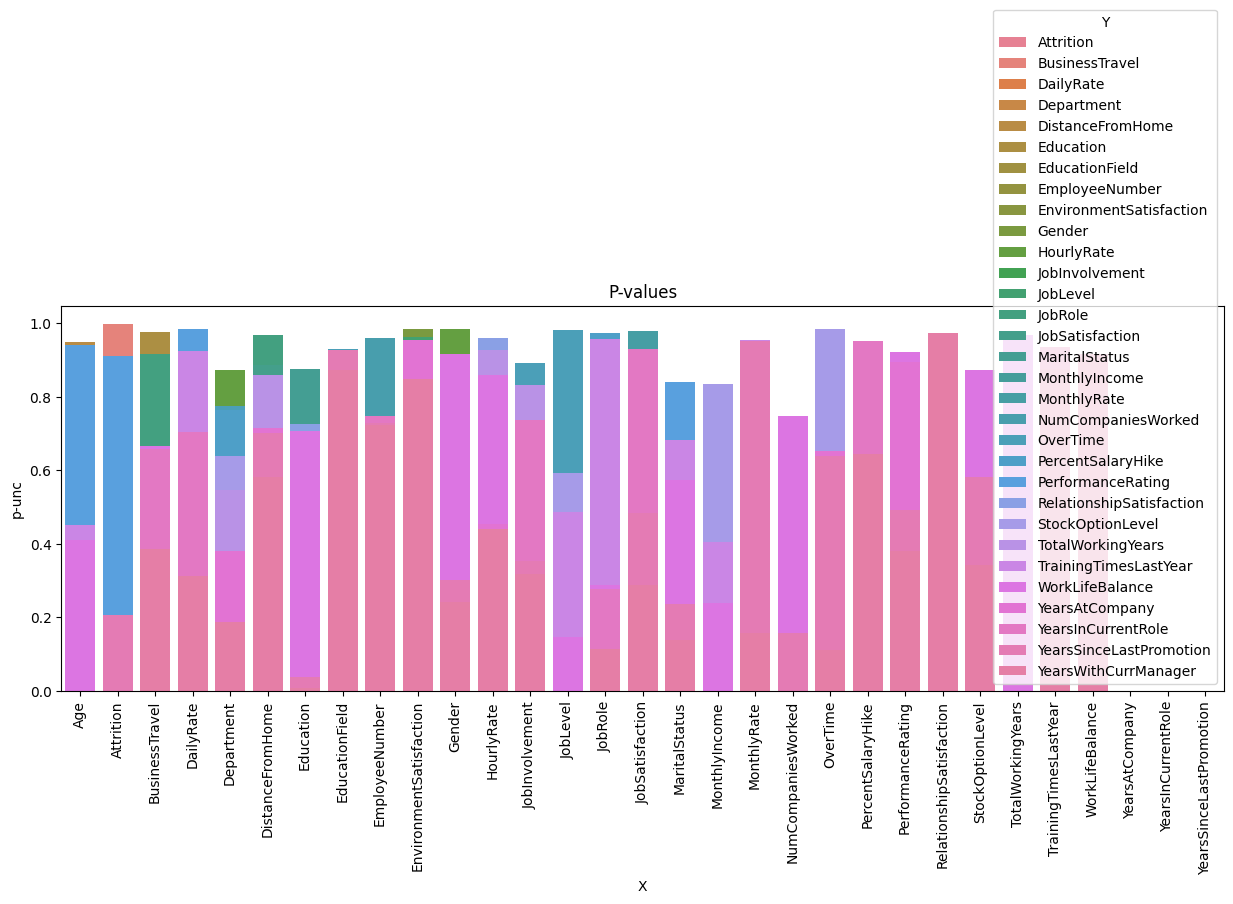

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(data=correlations, x='X', y='r', hue='Y', dodge=False)
plt.xticks(rotation=90)
plt.title('Correlation Coefficients')
plt.show()

# Plot p-values
plt.figure(figsize=(15, 5))
sns.barplot(data=correlations, x='X', y='p-unc', hue='Y', dodge=False)
plt.xticks(rotation=90)
plt.title('P-values')
plt.show()

In [19]:
pca = PCA(n_components=27)
df_pca = pca.fit_transform(df_scaled)

In [20]:

feature_importance = pd.Series(pca.components_[0], index=df_scaled.columns)

print(feature_importance.nlargest(27))

TotalWorkingYears           3.999928e-01
YearsAtCompany              3.856624e-01
JobLevel                    3.793882e-01
MonthlyIncome               3.712111e-01
YearsInCurrentRole          3.318983e-01
YearsWithCurrManager        3.259781e-01
YearsSinceLastPromotion     2.905036e-01
Age                         2.770835e-01
Education                   7.680089e-02
NumCompaniesWorked          4.805132e-02
StockOptionLevel            3.047652e-02
RelationshipSatisfaction    1.602157e-02
WorkLifeBalance             1.343080e-02
Department                  1.076871e-02
EnvironmentSatisfaction     5.581600e-03
MonthlyRate                 4.731265e-03
BusinessTravel              3.505274e-03
JobInvolvement              3.449355e-03
DistanceFromHome            1.908813e-03
PerformanceRating           2.238331e-04
EmployeeCount              -0.000000e+00
StandardHours              -8.295687e-43
Over18                     -3.761582e-37
DailyRate                  -9.288049e-04
JobSatisfaction 

# Component Structure Graphs

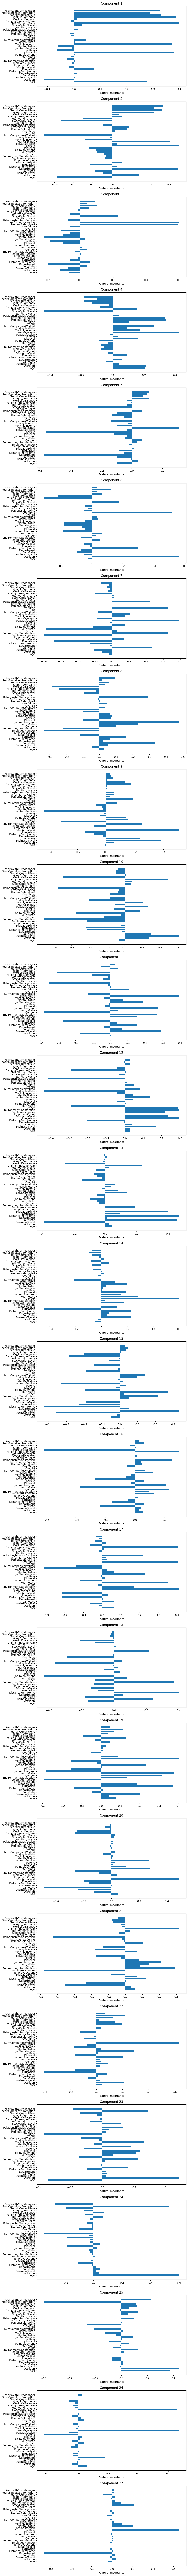

In [21]:
num_components = pca.n_components_
num_features = df.shape[1]

fig, axes = plt.subplots(num_components, 1, figsize=(10, num_components*5))

for i, ax in enumerate(axes):
    component = pca.components_[i]
    ax.barh(range(num_features), component)
    ax.set_yticks(range(num_features))
    ax.set_yticklabels(df.columns)
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Component {i+1}')

plt.tight_layout()
plt.show()

# Compute first principal component

In [22]:
X = df_scaled.values

weights = pca.components_[0]

first_component = np.dot(X, weights)

In [23]:
first_component

array([-0.68288437,  0.62954451, -2.72232386, ..., -1.19183091,
        0.94051915, -1.10562708])

In [26]:
import numpy as np

weights = pca.components_[0]

min_weight = np.min(weights)
max_weight = np.max(weights)

weights_scaled = ((weights - min_weight) / (max_weight - min_weight)) * 100

In [27]:
weights_scaled

array([ 76.07130267,   0.        ,  22.80947361,  21.94622101,
        24.22356282,  22.49866525,  37.07909647,  18.26971478,
        22.12704624,  20.68644265,  23.21370509,  16.95082188,
        20.41721576,  22.79858696,  95.9885852 ,   9.87235063,
        20.89399067,  10.49021107,  94.39661379,  23.04815695,
        31.48196068,  22.12704624,  19.77244395,  19.20021277,
        22.17062339,  25.24622001,  22.12704624,  28.06039437,
       100.        ,  20.34497574,  24.7418346 ,  97.21007578,
        86.74296773,  78.68401226,  85.59038705])

# First Component Histogram

Analysis of the Histogram shows up a left-skewed bell-curve, meaning most of the data points are projected on the right side along the first principal component.

This might indicate that the first component is capturing some asymmetry in the data.

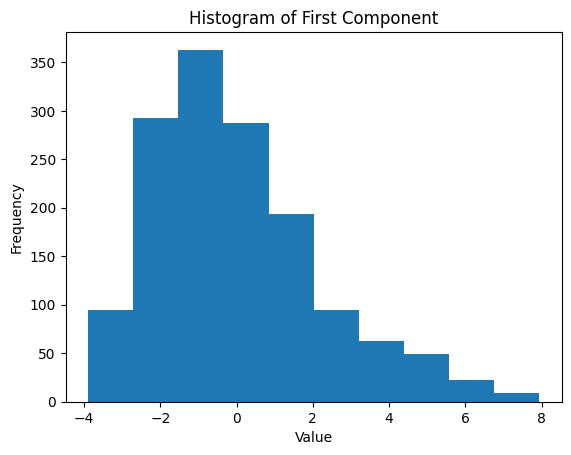

In [30]:
plt.hist(first_component, bins=10)
plt.title('Histogram of First Component')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()